# ***WEATHER DATASET ANALYSIS***

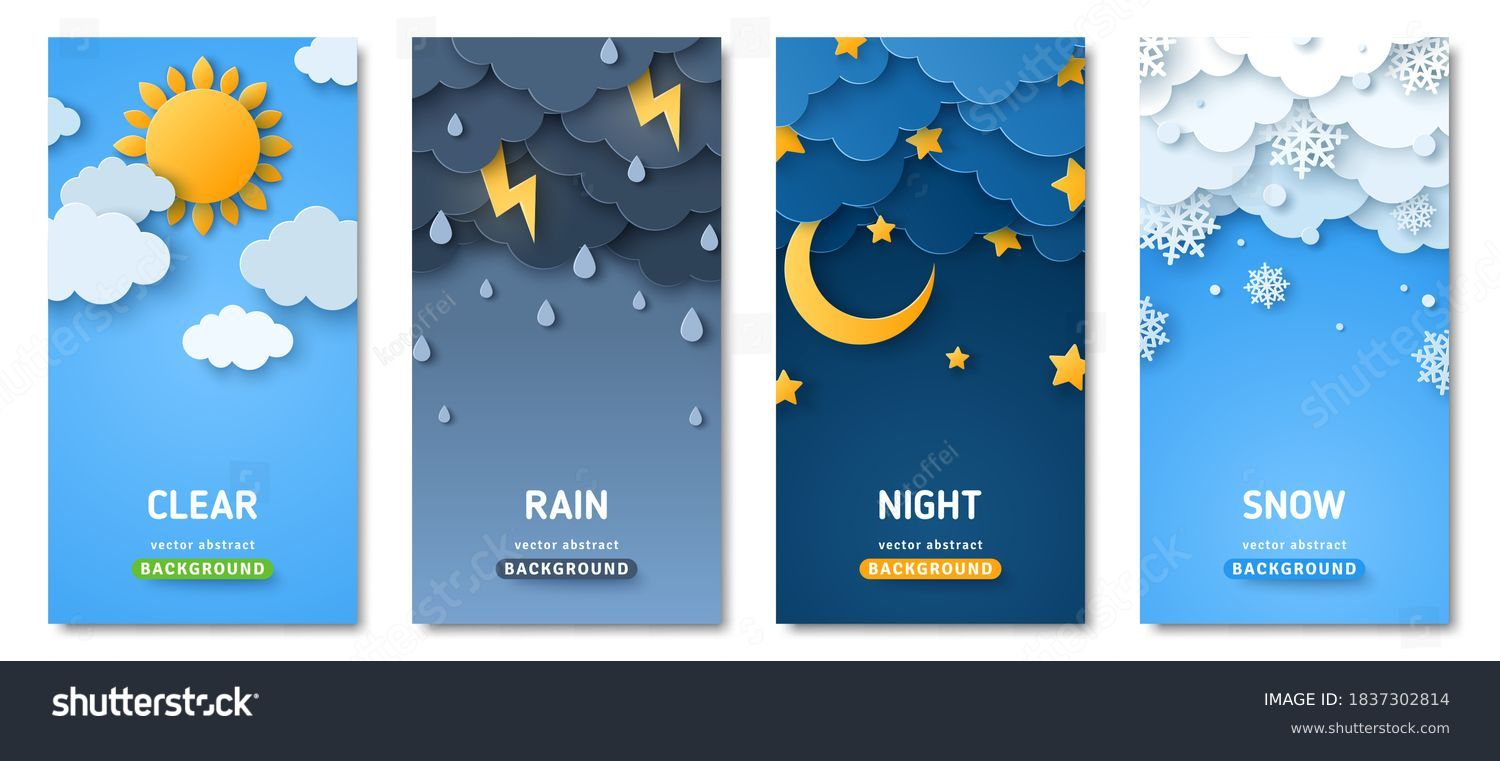

In [2]:
from IPython.display import Image
img = "weather_image.jpg"
Image(img)

### Source -> kaggle.com

# ***1.Data Import and Exploration:***

## -**Import Libraries:**

In [4]:
# import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## -**Read Dataset** :

In [5]:
# Read Dataset

data = pd.read_csv("weather_.csv")

## -**Head and Tail :**

In [3]:
# Head

data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


In [4]:
# Tail

data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,27-12-2015,8.6,4.4,1.7,2.9,rain
1457,28-12-2015,1.5,5.0,1.7,1.3,rain
1458,29-12-2015,0.0,7.2,0.6,2.6,fog
1459,30-12-2015,0.0,5.6,-1.0,3.4,sun
1460,31-12-2015,NaN,5.6,-2.1,3.5,sun


# ***2.Sanity Check of Data***

## -**Naming the Columns as given in dataset :**

In [6]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

## -**Removing date Column :**

In [5]:
# drop date (unneccessary column in dataset)

data=data.drop(columns=['date'])

## -**Shape :**

In [6]:
# Shape

data.shape

(1461, 5)

## -**Info :**

In [7]:
# info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1445 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1449 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


# ***3.Finding Missing Values***

In [8]:
# Finding missing values

data.isnull().sum()

precipitation    16
temp_max          0
temp_min         12
wind              0
weather           0
dtype: int64

In [9]:
# Percentage of missing values

data.isnull().sum()/data.shape[0]

precipitation    0.010951
temp_max         0.000000
temp_min         0.008214
wind             0.000000
weather          0.000000
dtype: float64

# ***4.Exploratory Data Analysis (EDA)***

## **Investigating the data**

## - **Descriptive Statistics for numeric values**

In [11]:
# Descriptive Statistics for numeric values

data.describe()

,precipitation,temp_max,temp_min,wind
count,1445.000000,1461.000000,1449.000000,1461.000000
mean,3.031003,25.547023,8.257281,21.995551
std,6.680389,270.073401,5.023279,634.189998
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,10000.000000,18.300000,24007.000000


## -**Descriptive Statistics for object values**

In [12]:
# Descriptive Statistics for object values

data.describe(include="object")

,weather
count,1461
unique,5
top,rain
freq,641


#### ****-Unique Values****

In [13]:
# Weather unique values

data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

## -**Boxplot to identify Outliers**

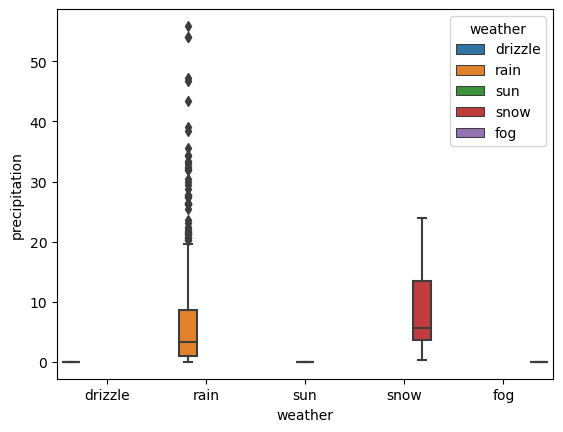

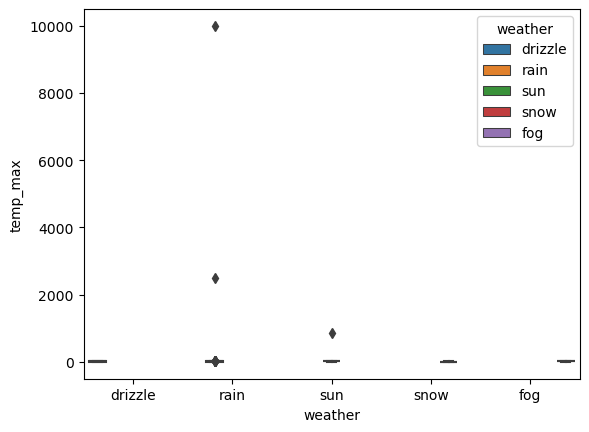

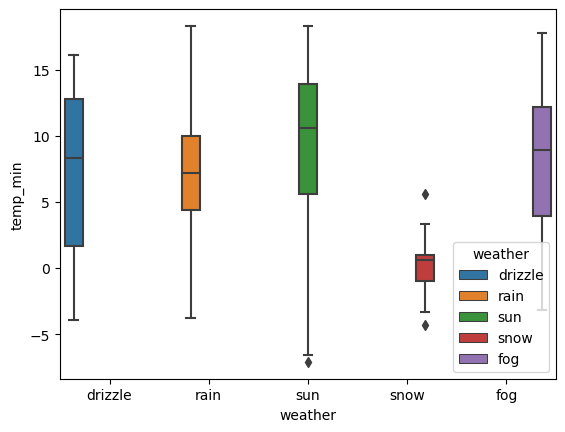

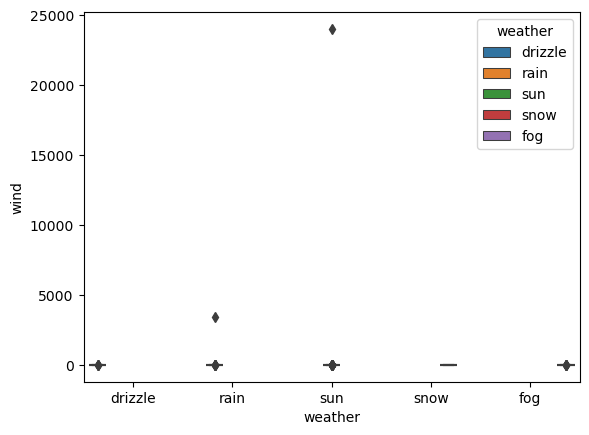

In [14]:
# Boxplot to identify Outliers

for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data,y=i,x="weather",width=0.9,hue="weather")
    plt.show()

# ***5.Data Cleaning and preprocessing***

## -**Missing value Treatment**

In [15]:
# Missing values

data.isnull().sum()

precipitation    16
temp_max          0
temp_min         12
wind              0
weather           0
dtype: int64

In [16]:
# Using median for filling missed values

for i in ["precipitation","temp_min"]:
    data[i].fillna(data[i].median(),inplace=True)

In [17]:
data.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

## -**Outlier Treatment**

In [18]:
# Removing outliers

# Create function 

def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw 

In [19]:
data.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [20]:
# Call whisker function to check

whisker(data['precipitation'])

(-4.199999999999999, 6.999999999999999)

In [21]:
# Use all numeric values to remove outliers

for i in ['precipitation', 'temp_max', 'temp_min', 'wind']:
    lw,uw=whisker(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])

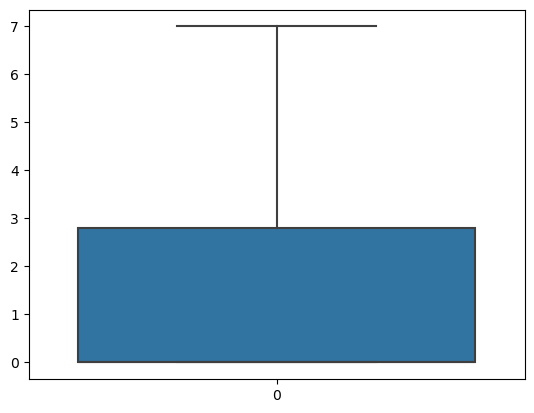

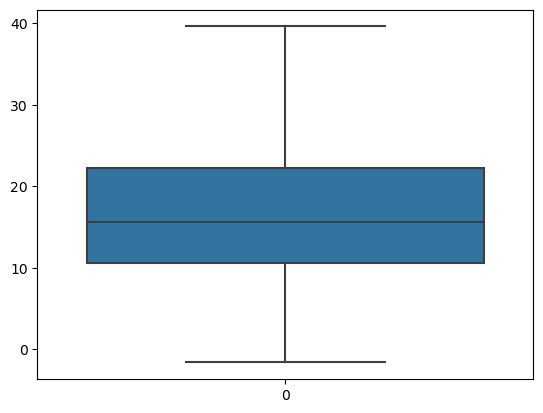

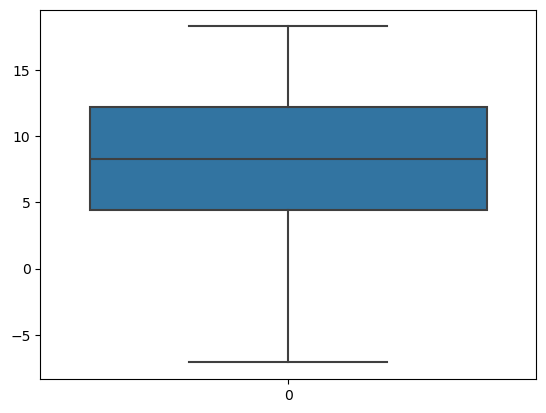

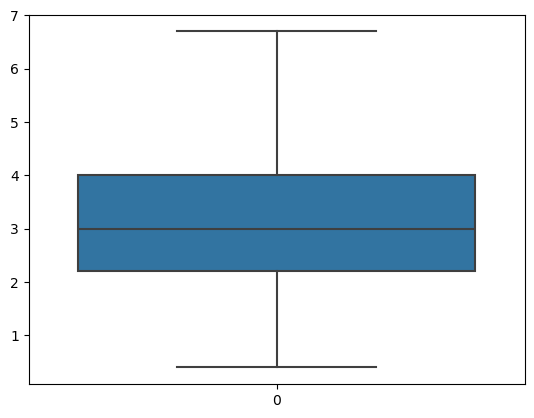

In [22]:
# Visualize boxplot to check

for i in ['precipitation', 'temp_max', 'temp_min', 'wind']:
    sns.boxplot(data[i])
    plt.show()

## -**Duplicate values Treatment**

In [23]:
# Check number of duplicates before
print(f"Number of duplicate rows before: {data.duplicated().sum()}")

# Drop duplicates
data_cleaned = data.drop_duplicates()

# Check number of duplicates after
print(f"Number of duplicate rows after: {data_cleaned.duplicated().sum()}")

# View the cleaned data
print(data_cleaned)

Number of duplicate rows before: 11
Number of duplicate rows after: 0
      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1               7.0      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3               7.0      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            7.0       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1450 rows x 5 columns]


## -**Encoding**

In [24]:
print(data.dtypes)

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


In [25]:
data.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [26]:
# Apply one-hot encoding to the weather column

data_encoded = pd.get_dummies(data, columns=['weather'], drop_first=False)
print(data_encoded.head())

   precipitation  temp_max  temp_min  wind  weather_drizzle  weather_fog  \
0            0.0      12.8       5.0   4.7             True        False   
1            7.0      10.6       2.8   4.5            False        False   
2            0.8      11.7       7.2   2.3            False        False   
3            7.0      12.2       5.6   4.7            False        False   
4            1.3       8.9       2.8   6.1            False        False   

   weather_rain  weather_snow  weather_sun  
0         False         False        False  
1          True         False        False  
2          True         False        False  
3          True         False        False  
4          True         False        False  


In [27]:
# Convert boolean to integers
data_encoded = data_encoded.apply(lambda x : x.astype(int) if x.dtype == 'bool' else x)

print(data_encoded.dtypes)
print(data_encoded.head())

precipitation      float64
temp_max           float64
temp_min           float64
wind               float64
weather_drizzle      int32
weather_fog          int32
weather_rain         int32
weather_snow         int32
weather_sun          int32
dtype: object
   precipitation  temp_max  temp_min  wind  weather_drizzle  weather_fog  \
0            0.0      12.8       5.0   4.7                1            0   
1            7.0      10.6       2.8   4.5                0            0   
2            0.8      11.7       7.2   2.3                0            0   
3            7.0      12.2       5.6   4.7                0            0   
4            1.3       8.9       2.8   6.1                0            0   

   weather_rain  weather_snow  weather_sun  
0             0             0            0  
1             1             0            0  
2             1             0            0  
3             1             0            0  
4             1             0            0  


In [28]:
# Display data_encoded dataframe

data_encoded.head()

,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,0.0,12.8,5.0,4.7,1,0,0,0,0
1,7.0,10.6,2.8,4.5,0,0,1,0,0
2,0.8,11.7,7.2,2.3,0,0,1,0,0
3,7.0,12.2,5.6,4.7,0,0,1,0,0
4,1.3,8.9,2.8,6.1,0,0,1,0,0


## -**Normalization**

In [29]:
# import sklearn library

from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['precipitation', 'temp_max', 'temp_min', 'wind']

scaler =  MinMaxScaler()

data[columns_to_normalize ] = scaler.fit_transform(data[columns_to_normalize])

print(data[columns_to_normalize].head())
print(data[columns_to_normalize].min())
print(data[columns_to_normalize].max())

   precipitation  temp_max  temp_min      wind
0       0.000000  0.349515  0.476378  0.682540
1       1.000000  0.296117  0.389764  0.650794
2       0.114286  0.322816  0.562992  0.301587
3       1.000000  0.334951  0.500000  0.682540
4       0.185714  0.254854  0.389764  0.904762
precipitation    0.0
temp_max         0.0
temp_min         0.0
wind             0.0
dtype: float64
precipitation    1.0
temp_max         1.0
temp_min         1.0
wind             1.0
dtype: float64


# ***6.Correlation***

In [30]:
# correlation matrix
# Assuming the dataframe as data_encoded 

correlation_matrix=data_encoded.corr()
print(correlation_matrix)

                 precipitation  temp_max  temp_min      wind  weather_drizzle  \
precipitation         1.000000 -0.333889 -0.131335  0.355887        -0.124274   
temp_max             -0.333889  1.000000  0.859101 -0.160922        -0.014770   
temp_min             -0.131335  0.859101  1.000000 -0.062822        -0.044473   
wind                  0.355887 -0.160922 -0.062822  1.000000        -0.120121   
weather_drizzle      -0.124274 -0.014770 -0.044473 -0.120121         1.000000   
weather_fog          -0.174556  0.009803 -0.013985 -0.146470        -0.052872   
weather_rain          0.658474 -0.353882 -0.112654  0.260825        -0.171537   
weather_snow          0.161501 -0.198235 -0.218330  0.113862        -0.026115   
weather_sun          -0.565540  0.407320  0.194763 -0.171054        -0.171299   

                 weather_fog  weather_rain  weather_snow  weather_sun  
precipitation      -0.174556      0.658474      0.161501    -0.565540  
temp_max            0.009803     -0.353882   

## -**Heatmap**

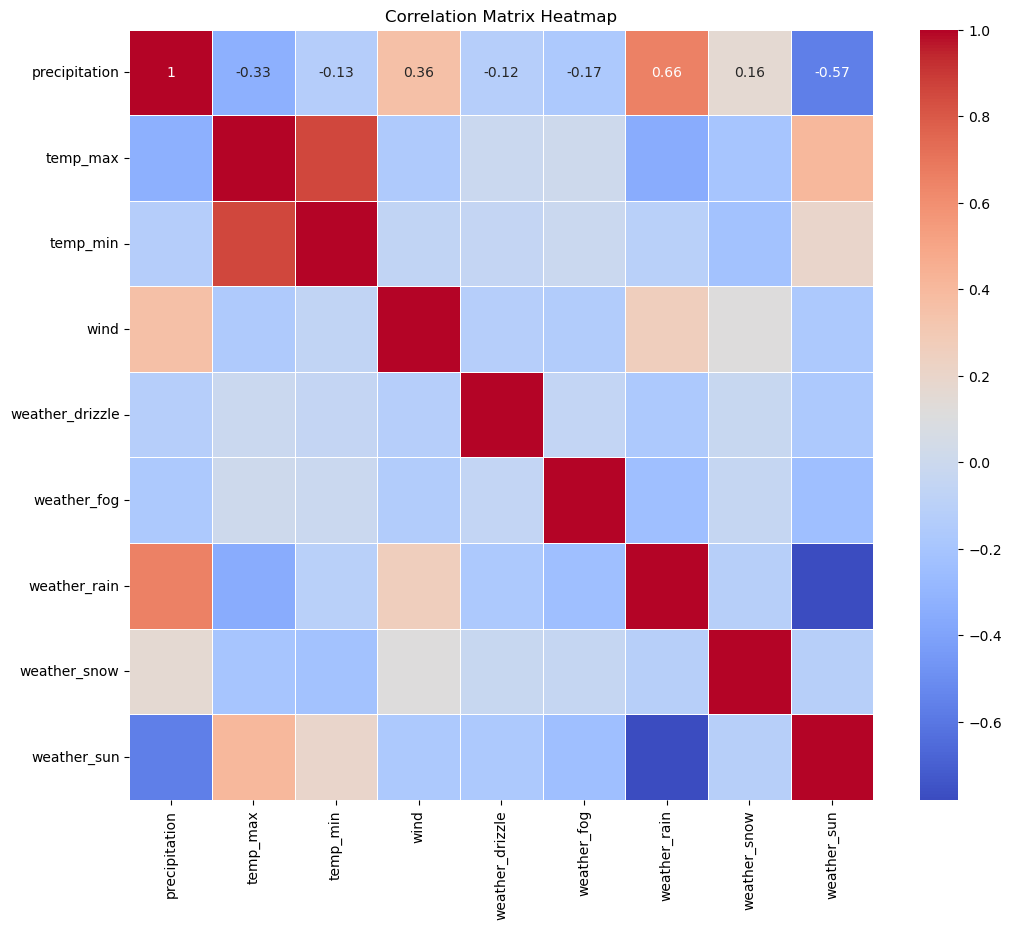

In [31]:
# Heatmap to visualize the correlation
# Correlation analysis to identify relationship between parameters

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,cmap='coolwarm',linewidths=0.5,annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# ***7.Regression Analysis***

## -**Import Libraries:**

In [32]:
# import necessary libraries for regression analysis

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
data_encoded.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather_drizzle',
       'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun'],
      dtype='object')

In [34]:
# Assuming the dataframe as data_encoded 
# Define target and features

# Target variable Precipitation(y)
# Features variable reamaining columns except precipitation(X)

X = data_encoded[['temp_max', 'temp_min', 'wind', 'weather_drizzle',
       'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun']]
y = data_encoded['precipitation']

In [35]:
# Split the data
# Split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state=42)

In [36]:
# Create and train the regression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_prediction = model.predict(X_test)

In [38]:
# Evaluate the model

mse = mean_squared_error(y_test,y_prediction)
r2= r2_score(y_test, y_prediction)

print(f"Mean Squared Error: {mse}")
print(f"R Squared: {r2}")

Mean Squared Error: 3.072103754948882
R Squared: 0.5079668416992722


# ***8.Visualization***

C:\Users\AAKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


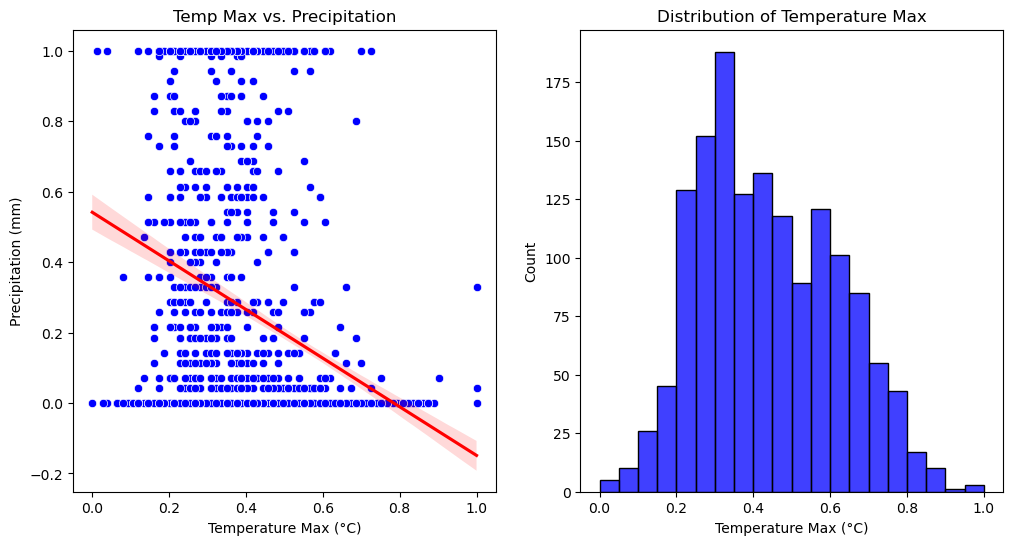

In [39]:
# visualize the relationships between temp_max, temp_min, wind, and precipitation

# Temp Max vs. Precipitation
# Scatter plot for temp_max vs precipitation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['temp_max'], y=data['precipitation'], color='blue')
sns.regplot(x=data['temp_max'], y=data['precipitation'], scatter=False, color='red')
plt.xlabel('Temperature Max (°C)')
plt.ylabel('Precipitation (mm)')
plt.title('Temp Max vs. Precipitation')

# Histogram of temp_max
plt.subplot(1, 2, 2)
sns.histplot(data['temp_max'], color='blue', bins=20)
plt.xlabel('Temperature Max (°C)')
plt.title('Distribution of Temperature Max')
plt.show()

C:\Users\AAKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


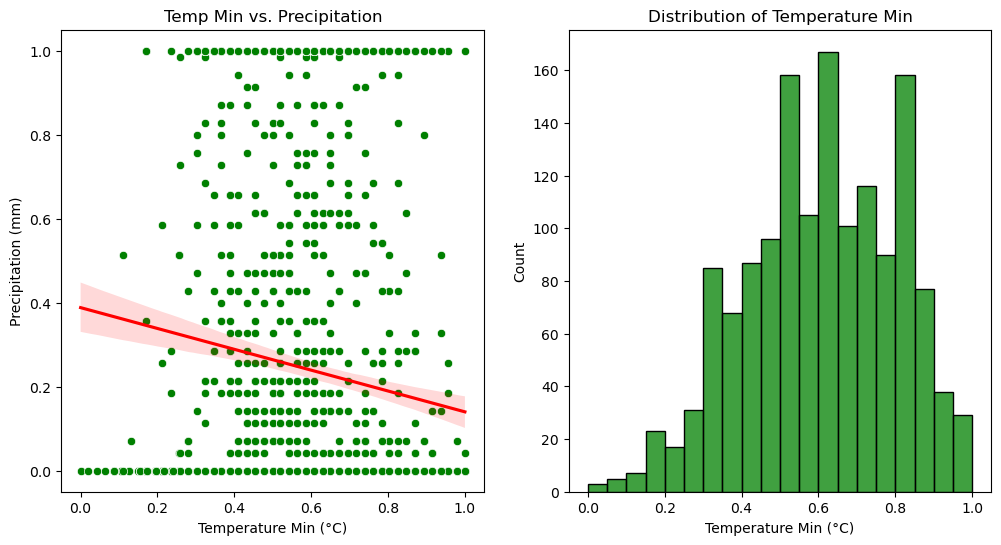

In [40]:
#Temp Min vs. Precipitation
# Scatter plot for temp_min vs precipitation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['temp_min'], y=data['precipitation'], color='green')
sns.regplot(x=data['temp_min'], y=data['precipitation'], scatter=False, color='red')
plt.xlabel('Temperature Min (°C)')
plt.ylabel('Precipitation (mm)')
plt.title('Temp Min vs. Precipitation')

# Histogram of temp_min
plt.subplot(1, 2, 2)
sns.histplot(data['temp_min'], color='green', bins=20)
plt.xlabel('Temperature Min (°C)')
plt.title('Distribution of Temperature Min')
plt.show()


C:\Users\AAKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


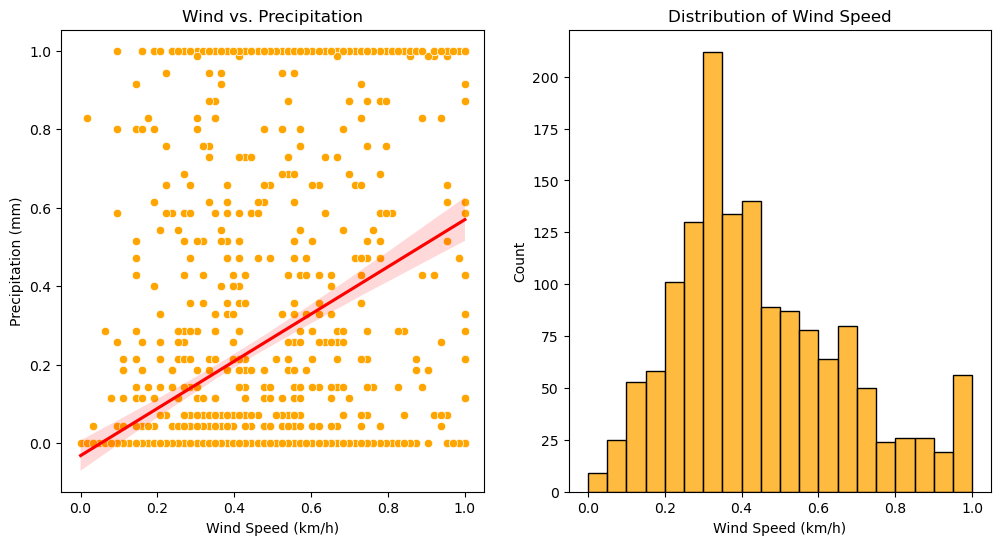

In [41]:
#Wind vs. Precipitation
# Scatter plot for wind vs precipitation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['wind'], y=data['precipitation'], color='orange')
sns.regplot(x=data['wind'], y=data['precipitation'], scatter=False, color='red')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Precipitation (mm)')
plt.title('Wind vs. Precipitation')

# Histogram of wind
plt.subplot(1, 2, 2)
sns.histplot(data['wind'], color='orange', bins=20)
plt.xlabel('Wind Speed (km/h)')
plt.title('Distribution of Wind Speed')
plt.show()

# ***Submitted by:*** **`Aarthy SM`**